## Setup

In [79]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

### The Normal Equation

$\hat{\theta} = (X^{T}X)X^{T}y$

Text(0, 0.5, '$y$')

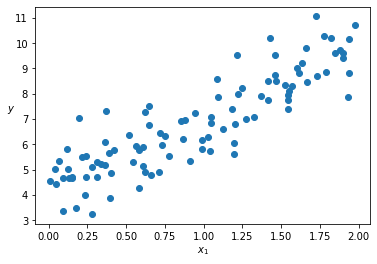

In [80]:
# Generate some linear-looking data to test this equation
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)

In [81]:
# Computting the Normal Equation
X_b = np.c_[np.ones((100,1)), X] # This adds x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # Normal Equation
# X_b.T, transposed X_b and dot product from itself.
print(theta_best)

[[4.21509616]
 [2.77011339]]


From the original function the right parameters would be 4 and 3.

$y = 4 + 3*X + noise$

In [82]:
# Making predictions using theta_hat
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

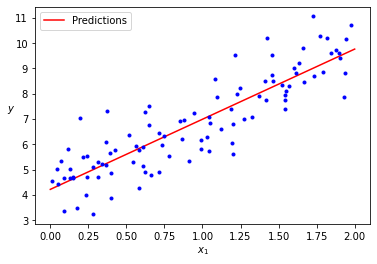

In [83]:
# Plotting model's predictions
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.legend(loc='upper left')

In [84]:
# Comparison with Scikit linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [85]:
# Prediction
y_pred_lin_reg = lin_reg.predict(X_new)
print(y_pred_lin_reg)

[[4.21509616]
 [9.75532293]]


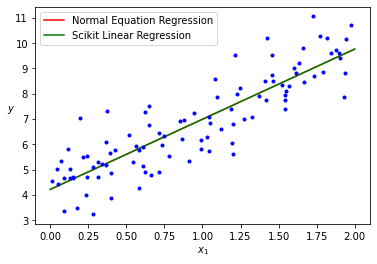

In [86]:
# Plotting all model's predictions
plt.plot(X_new, y_predict, 'r-', label='Normal Equation Regression')
plt.plot(X_new, y_pred_lin_reg, 'g-', label='Scikit Linear Regression')
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.legend(loc='upper left')

Scikit uses the pseudo-inverse matrix: $X^{+}$ to compute the $\hat{\theta}$. Which is always defined.

### Gradient Descent
Tweaking parameters in order to iteratively minimize a cost function.

#### Batch Gradient Descent

Compute change in the _Cost Function_ by changes in the $\theta_{j}$ parameter ( _Partial Derivative_ ).

Partial Derivatives of the Cost Function:
$$\frac{\partial}{\partial\theta_{j}}MSE(\theta) = \frac{2}{m}\sum_{i=1}^m(\theta^{T}x^{(i)}-y^{i})x_{j}^{(i)}$$

Gradient Vector of the Cost Function:
$$\nabla_{\theta}MSE(\theta) = \frac{2}{m}X^{T}(X\theta - y)$$

Gradient Descent Step:
$$\theta^{(next step)} = \theta - \eta\nabla_{\theta}MSE(\theta)$$

In [87]:
# Quick Implementation
eta = 0.1         # Learning Rate
n_iterations = 1000
m = 100              # Features

theta = np.random.randn(2,1) # Random Initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # Gradient Vector of the Cost Function
    theta = theta - (eta * gradients )                # Gradient Descent Step
    
theta

array([[4.21509616],
       [2.77011339]])

In [88]:
y_pred_gd = X_new_b.dot(theta)

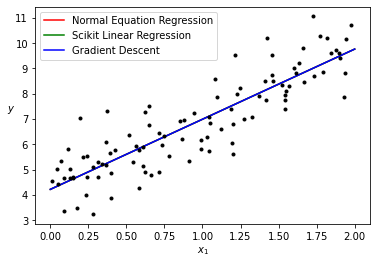

In [89]:
plt.plot(X_new, y_predict, 'r-', label='Normal Equation Regression')
plt.plot(X_new, y_pred_lin_reg, 'g-', label='Scikit Linear Regression')
plt.plot(X_new, y_pred_gd, 'b-', label='Gradient Descent')
plt.plot(X, y, 'k.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.legend(loc='upper left')

In [96]:
theta_path_bgd = []

theta = np.random.randn(2,1)

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'g-' if iteration > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # Gradient Vector of the Cost Function
        theta = theta - (eta * gradients )                # Gradient Descent Step
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('$x_1$')
    plt.axis([0,2,0,15])
    plt.title(f'$\eta = {eta}$')

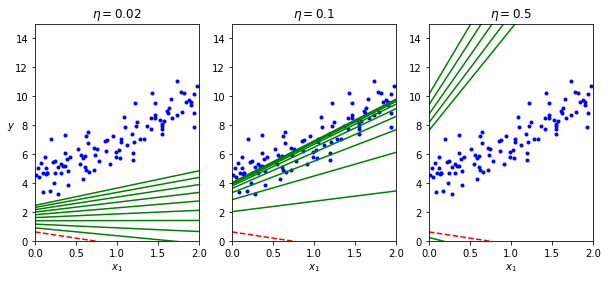

In [98]:
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel('$y$', rotation=0)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

### Stochastic Gradient Descent